<a href="https://colab.research.google.com/github/Tywashburn22/Machine-Learning/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [38]:
iris = load_iris()
X = iris.data
y = iris.target

In [39]:
k_range = range(1,31)

In [40]:
cv_scores = []

In [41]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [42]:
good_k = k_range[np.argmax(cv_scores)]

In [43]:
print(f"Optimal K value: {good_k}")

Optimal K value: 13


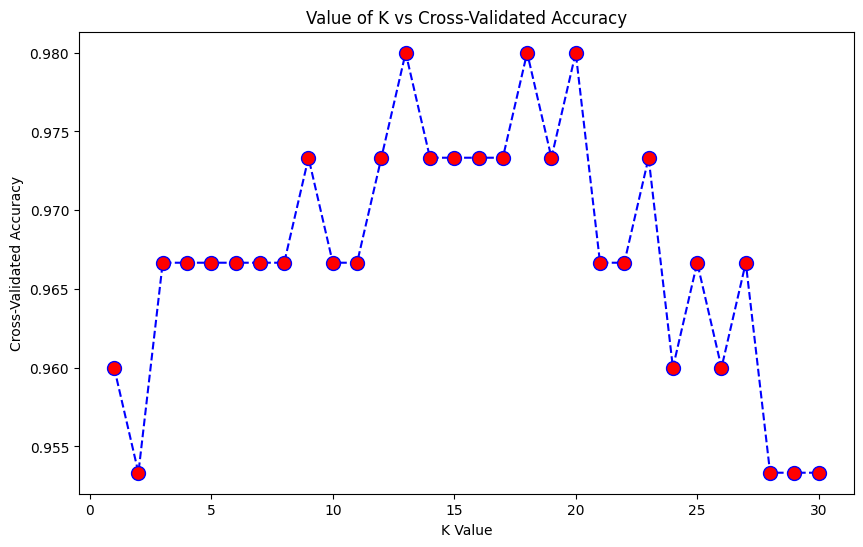

In [44]:
plt.figure(figsize=(10,6))
plt.plot(k_range, cv_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Value of K vs Cross-Validated Accuracy')
plt.show()

In [45]:
check_grid = {'n_neighbors': range(1,31)}
knn = KNeighborsClassifier()

In [46]:
grid = GridSearchCV(knn, check_grid, cv=10, scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [47]:
print(f"Best K using GridSearch: {grid.best_params_['n_neighbors']}")
print(f"Best cross-validated accuracy: {grid.best_score_:.4f}")

Best K using GridSearch: 13
Best cross-validated accuracy: 0.9800


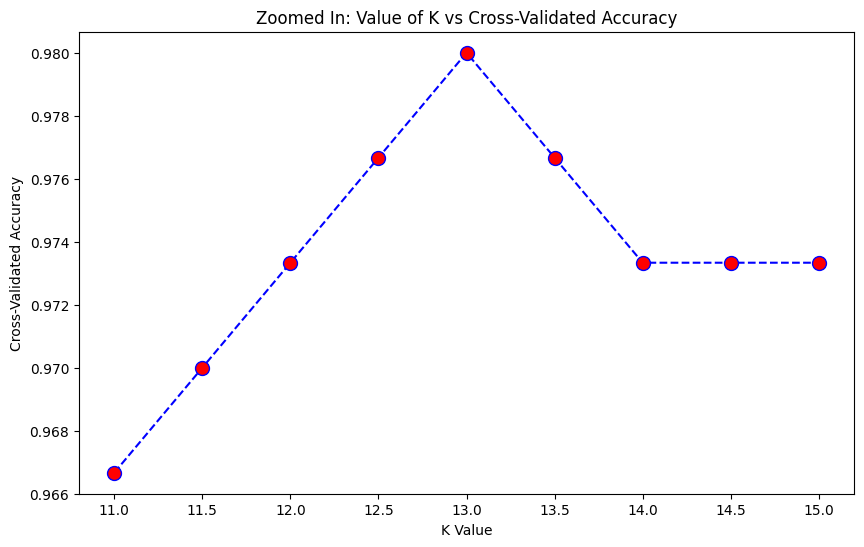

In [48]:
x_values = np.arange(11.0, 15.5, 0.5)
y_values = np.interp(x_values, k_range, cv_scores)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Zoomed In: Value of K vs Cross-Validated Accuracy')
plt.show()